# **MANDACARU.DEV - TIME 09 - CLASSIFICADOR DE SENTIMENTOS DE NOTÍCIAS - PERSPECTIVA ANALÍTICA**

---
Akyla de Aquino Pinto \
Cauã Braga de Lima \
Francisco Evandro Ribeiro Martins Filho \
Geovana Rodrigues da Pascoa Souza \
Yann Lucca Miranda Martins Barros 
---

In [ ]:
#IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
from collections import Counter
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors	import	KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2023-12-07 00:10:18.195183: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 00:10:18.195306: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 00:10:18.195385: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 00:10:20.072309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# **1. ANÁLISE DE SENTIMENTOS**

---
Este projeto utiliza técnicas de processamento de linguagem natural (PLN) para classificar os sentimentos de trechos de notícias. A motivação para esse projeto surge em resposta à crescente necessidade de compreender o tom emocional presente na vasta quantidade de informações disponíveis nos meios de comunicação. Em um mundo onde notícias e informações são disseminadas em ritmo acelerado, a capacidade de automatizar a análise de sentimentos em trechos de notícias torna-se essencial para diversas aplicações e setores.


# **2. DATASET**


---

A base de dados utilizada foi disponibilizada pela organização do Mandacaru.Dev e contém colunas referentes às sentenças a serem analisadas (coluna Sentence) e os sentimentos associados a essas sentenças (coluna Sentiment), sendo classificados em positivos, negativos ou neutros. Segue uma amostra de 10 elementos do DataSet:

In [ ]:
#CARREGAMENTO DO DATASET EM FORMA DE DATAFRAME E EXIBIÇÃO OS 10 PRIMEIROS ELEMENTOS:
dataset = pd.read_csv("/content/data.csv")
dataset.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


# **3. PRÉ-PROCESSAMENTO**

---
As técnicas de remoção de caracteres especiais, remoção de StopWords, Lematização, Normalização, remoção de links e Tokenização foram utilizadas para o processamento textual da coluna "Sentence". O pré-processamento foi realizando utilizando a GPU do Google Colab contendo todas as 5842 linhas do DataSet. O algoritmo de pré-processamento está documentado a seguir:



In [ ]:
#EXTRAÇÃO DO TIPO DE DADOS DO DATASET:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
#SALVANDO A COLUNA "SENTENCE" EM UMA LISTA:
noticia = dataset.Sentence

#SALVANDO A COLUNA "SENTIMENT" EM UMA LISTA:
sentimento = dataset.Sentiment

In [ ]:
#REMOÇÃO DE LINHAS REPETIDAS DO DATASET:
boole = noticia.duplicated()

noticia_nao_repetida = []
sentimento_nao_repetido = []

for i in range(len(noticia)):
  if not boole[i]:
    noticia_nao_repetida.append(noticia[i])
    sentimento_nao_repetido.append(sentimento[i])

In [ ]:
#REMOÇÃO DE LINKS DA COLUNA "SENTENCE" DO DATASET:
def remove_links(sentence):
    link_padrao = re.compile(r'https?://\S+|www\.\S+')
    sentenca_sem_links = re.sub(link_padrao, '', sentence)

    return sentenca_sem_links

# Exemplo de uso
noticia_sem_links = [remove_links(sentenca) for sentenca in noticia_nao_repetida]

In [ ]:
#TOKENIZAÇÃO DA COLUNA "SENTENCE":
noticia_tokens = [nltk.word_tokenize(noticia) for noticia in noticia_sem_links]

#NORMALIZAÇÃO DA COLUNA "SENTENCE":
noticia_normalizado = [None]*len(noticia_tokens)
for i in range (len(noticia_tokens)):
  noticia_normalizado[i] = [word.lower() for word in noticia_tokens[i] if word.isalnum()]

#NORMALIZAÇÃO DA COLUNA "SENTIMENT":
sentimento_normalizado = [word.lower() for word in sentimento_nao_repetido if word.isalpha]

In [ ]:
#REMOÇÃO DE STOPWORDS DA COLUNA "SENTENCE":
noticia_filtrado = [None]*len(noticia_normalizado)
stop_words = set(stopwords.words('english'))
for i in range (len(noticia_normalizado)):
  noticia_filtrado[i] = [token.lower() for token in noticia_normalizado[i] if not token in stop_words]

In [ ]:
#LEMATIZAÇÃO TEXTUAL DA COLUNA "SENTENCE":
lematizador = WordNetLemmatizer()
noticia_lematizado = [None]*len(noticia_filtrado)
for i in range (len(noticia_tokens)):
  noticia_lematizado[i] = [lematizador.lemmatize(token) for token in noticia_filtrado[i]]

In [ ]:
#ARMAZENAMENTO DOS DADOS TRATADOS EM UM NOVO DATASET:
novo_dataset = pd.DataFrame({'Sentence':noticia_lematizado, 'Sentiment':sentimento_normalizado})

#AMOSTRA DOS DADOS TRATADOS:
novo_dataset.head(10)

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, low, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sale, d...",positive
3,"[according, chamber, commerce, major, construc...",neutral
4,"[swedish, buyout, firm, sold, remaining, perce...",neutral
5,"[spy, would, surprised, see, green, close]",positive
6,"[shell, 70, billion, bg, deal, meet, sharehold...",negative
7,"[ssh, communication, security, corp, stock, ex...",negative
8,"[kone, net, sale, rose, 14, first, nine, month...",positive
9,"[stockmann, department, store, total, floor, s...",neutral


# **4. ANÁLISE EXPLORATÓRIA**

---
A respeito da análise exploratória dos dados do dataset fornecido, as técnicas utilizadas a fim de extrair informações relevantes que indicam a tendência estatística dos dados em questão incluem UnderSampling, nuvens de palavras para cada classe e plotagem de gráficos estatísticos, dos quais estão inclusos o gráfico de barras n-gram e o histograma de palavras por notícia. Também foi feito um levantamento das entidades renomadas citadas na coluna "Sentence" do dataset e uma distribuição de frequência de palavras por notícia. Por fim, foi calculada a similiaridade entre cada uma das notícias e exibida a matriz de similaridade em questão. Segue o algoritmo referente:


In [ ]:
#PROCESSO DE UNDERSAMPLING:

#CONTAGEM DAS INSTÂNCIAS DAS CLASSES DA COLUNA "SENTIMENT":
counts = novo_dataset['Sentiment'].value_counts()

#IDENTIFICAÇÃO DA CLASSE COM O MENOR NÚMERO DE INSTÂNCIAS:
sentimento_minimo = counts.idxmin()

#INICIALIZAÇÃO DE UM DATAFRAME VAZIO PARA ARMAZENAR OS SUBCONJUNTOS BALANCEADOS:
dfs_balanceados = []

#ITERAÇÃO SOBRE CADA CLASSE:
for sentimento in counts.index:
    #DIVISÃO DO DATAFRAME EM SUBCONJUNTOS POR CLASSE:
    df_classe = novo_dataset[novo_dataset['Sentiment'] == sentimento]

    #REALIZAÇÃO DE UNDERSAMPLING CASO A CLASSE EM QUESTÃO NÃO SEJA A COM O MENOR NÚMERO DE INSTÂNCIAS:
    if sentimento != sentimento_minimo:
        df_classe_downsampled = resample(df_classe, replace=False, n_samples=counts[sentimento_minimo], random_state=42)
        dfs_balanceados.append(df_classe_downsampled)
    else:
        #INCLUSÃO DA CLASSE, CASO SEJA A COM O MENOR NÚMERO DE INSTÂNCIAS, NO DATAFRAME BALANCEADO:
        dfs_balanceados.append(df_classe)

#COMBINAÇÃO DOS SUBCONJUNTOS BALANCEADOS:
df_balanceado = pd.concat(dfs_balanceados)

#EXIBIÇÃO DO DATAFRAME BALANCEADO:
print(df_balanceado)

                                               Sentence Sentiment
866   [customer, include, company, energy, process, ...   neutral
2643     [investment, worth, approximately, eur, 100mn]   neutral
4371  [honkarakenne, also, decided, yesterday, sell,...   neutral
2920  [company, said, offshore, segment, represented...   neutral
2016  [vaisala, present, weather, detector, measure,...   neutral
...                                                 ...       ...
5296                    [fb, hitting, everything, twtr]  negative
5298                                  [bobe, premarket]  negative
5303                                   [acad, 2, today]  negative
5313         [sbux, pm, db, downgrade, pt, cut, 70, 64]  negative
5317  [hsbc, say, unit, book, 585, million, charge, ...  negative

[1776 rows x 2 columns]


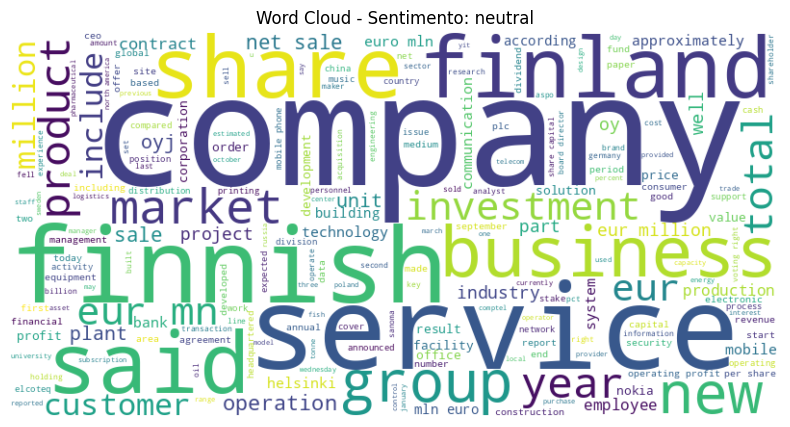

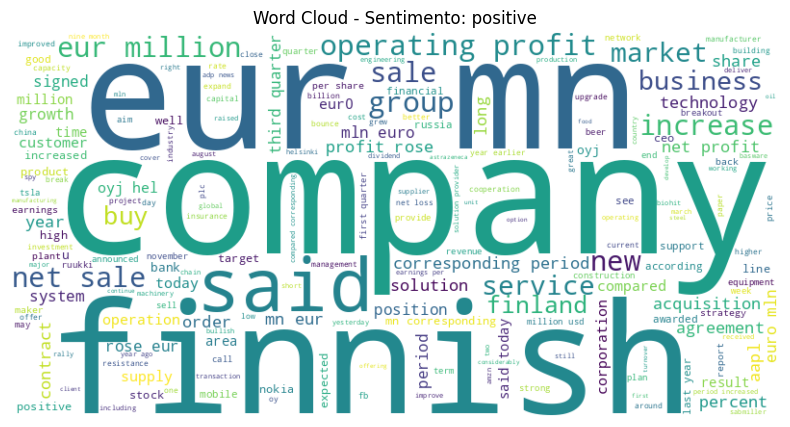

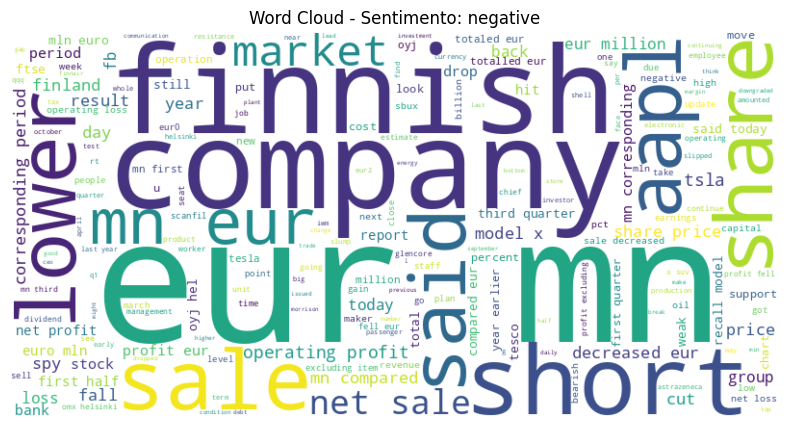

In [ ]:
#PLOTAGEM DE NUVENS DE PALAVRAS:

#JUNÇÃO DAS PALAVRAS TOKENIZADAS EM UMA ÚNICA STRING PARA CADA CLASSE:
texto_sentimento = {}
for sentimento in df_balanceado['Sentiment'].unique():
    tokenized_news = df_balanceado[df_balanceado['Sentiment'] == sentimento]['Sentence'].values
    texto_sentimento[sentimento] = ' '.join([' '.join(tokens) for tokens in tokenized_news])

#CRIAÇÃO E EXIBIÇÃO DA NUVEM DE PALAVRAS PARA CADA CLASSE DE SENTIMENTO:
for sentimento, texto in texto_sentimento.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentimento: {sentimento}')
    plt.axis('off')
    plt.show()

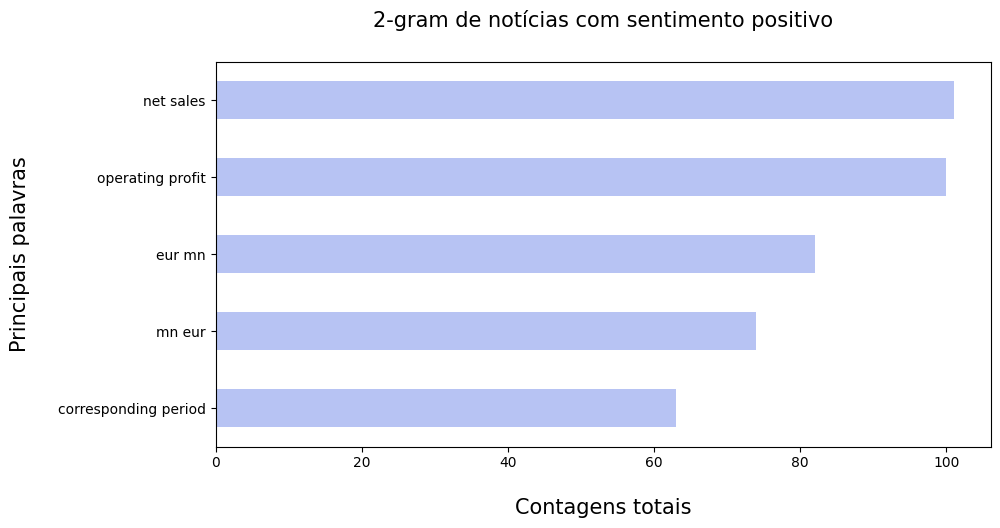

In [ ]:
#PLOTAGEM DE GRÁFICOS N-GRAM PARA CADA CLASSE DE SENTIMENTO:

#ARMAZENAMENTO DAS STOPWORDS PARA PLOTAGEM DO N-GRAM:
stopwords = list(set(nltk.corpus.stopwords.words("english")))
df2 = pd.DataFrame({'Sentence':noticia_sem_links, 'Sentiment':sentimento_nao_repetido})

def Gram_Analysis(Corpus, Gram, N):
  #INSTÂNCIA DO VETORIZADOR
  Vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=(Gram,Gram))
  #MATRIZ DE N-GRAMS:
  ngrams = Vectorizer.fit_transform(Corpus)
  #FREQUÊNCIA DE N-GRAMS:
  Count = ngrams.sum(axis=0)
  #LISTA DE PALAVRAS:
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]
  #ORDENAÇÃO DESCENDENTE COM CHAVE:
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

#UNIGRAMS:
#2-GRAM PARA A CLASSE DE SENTIMENTOS "POSITIVO":
df_positive = df2[df2["Sentiment"] == "positive"].dropna()
words_p = Gram_Analysis(df_positive["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_p, columns = ["Words", "Counts"])

#VISUALIZAÇÃO DOS DADOS:
color_p=['#B7C3F3']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_p, figsize = (10, 5))
plt.title("2-gram de notícias com sentimento positivo", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagens totais", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/p_2gram.png', dpi=300)
plt.show()

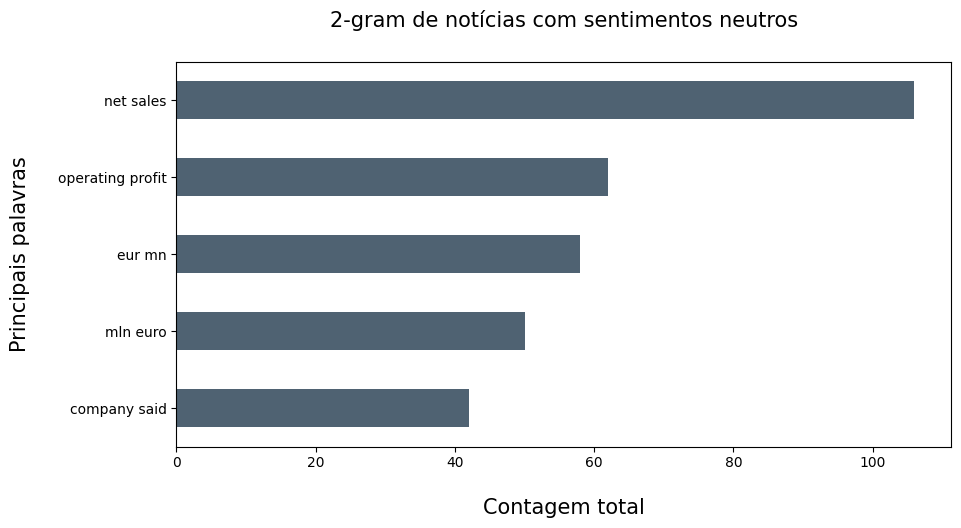

In [ ]:
#2-GRAM PARA A CLASSE DE SENTIMENTOS "NEUTRO":
df_neutral = df2[df2["Sentiment"] == "neutral"].dropna()
words_nl = Gram_Analysis(df_neutral["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_nl, columns = ["Words", "Counts"])

#VISUALIZAÇÃO DOS DADOS:
color_nl = ['#4F6272']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_nl, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos neutros", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/nl_2gram.png', dpi=300)
plt.show()

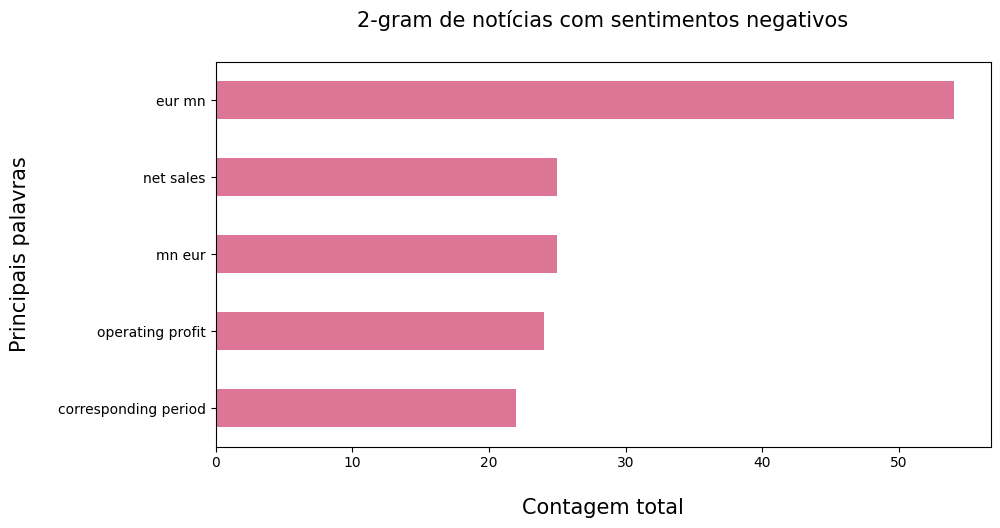

In [ ]:
#2-GRAM PARA A CLASSE DE SENTIMENTOS "NEGATIVO":
df_negative = df2[df2["Sentiment"] == "negative"].dropna()
words_n = Gram_Analysis(df_negative["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_n, columns = ["Words", "Counts"])

#VISUALIZAÇÃO DOS DADOS:
color_n = ['#DD7596']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_n, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos negativos", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/n_2gram.png', dpi=300)
plt.show()

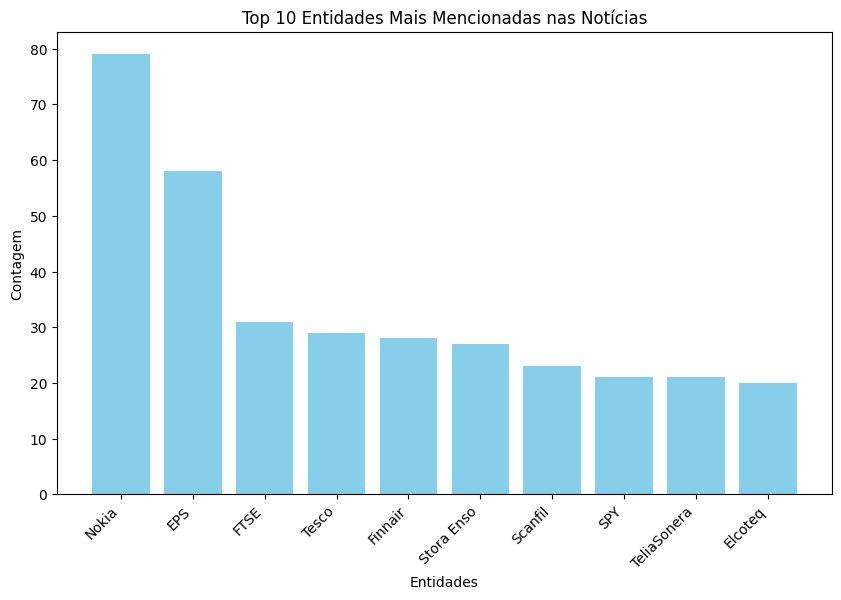

In [ ]:
#LEVANTAMENTO DAS EMPRESAS PRESENTES NO DATASET:

#CARREGANDO O MODELO DE IDIOMA EM PORTUGUÊS:
nlp = spacy.load("en_core_web_sm")

#FUNÇÃO PARA EXTRAIR NOMES DE EMPRESAS DOS TEXTOS::
def extrair_entidades(noticia):
    texto = ''.join(noticia)
    doc = nlp(texto)
    entidades = [entidade.text for entidade in doc.ents if entidade.label_ in ['ORG', 'PERSON'] and entidade.text not in ['EUR', 'EUR2', 'Group', 'Company']]
    return entidades

#APLICAÇÃO DA FUNÇÃO AOS TEXTOS DA COLUNA 'SENTENCE':
dataset['Referenced Organization'] = dataset['Sentence'].apply(extrair_entidades)

#FLATTEN DA LISTA DE NOMES DE EMPRESAS:
todas_entidades = [entidade for sublist in dataset['Referenced Organization'].tolist() for entidade in sublist]

#CONTAGEM DE EMPRESAS:
contagem_entidades = Counter(todas_entidades)

#TOP 10 EMPRESAS MAIS MENCIONADAS:
top_entidades = contagem_entidades.most_common(10)

#VISUALIZAÇÃO DA CONTAGEM DE EMPRESAS:
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_entidades), color='skyblue')
plt.xlabel('Entidades')
plt.ylabel('Contagem')
plt.title('Top 10 Empresas Mais Mencionadas nas Notícias')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#PERSONALIZAÇÃO DO DATASET PARA PLOTAGEM DOS HISTOGRAMAS:

#FUNÇÃO PARA EXTRAIR OS 3 PRIMEIROS TOKENS DE UMA LISTA DE TOKENS:
def extrair_tres_primeiros(tokens):
    return ' '.join(tokens[:3])

#CRIAÇÃO DE UMA NOVA COLUNA "FIRST 3 WORDS" COM OS 3 PRIMEIROS TOKENS DA NOTÍCIA:
df_balanceado['First 3 words'] = df_balanceado['Sentence'].apply(extrair_tres_primeiros)

#FUNÇÃO PARA CONTAR O NÚMERO DE TOKENS:
def contar_palavras(tokens):
    return len(tokens)

#CRIAÇÃO DE UMA NOVA COLUNA "NUMBER OF WORDS" COM O NÚMERO DE PALAVRAS DE CADA NOTÍCIA:
df_balanceado['Number of words'] = df_balanceado['Sentence'].apply(contar_palavras)

#VISUALIZAÇÃO DO DATASET PERSONALIZADO:
df_balanceado

,Sentence,Sentiment,First 3 words,Number of words
866,"[customer, include, company, energy, process, ...",neutral,customer include company,8
2643,"[investment, worth, approximately, eur, 100mn]",neutral,investment worth approximately,5
4371,"[honkarakenne, also, decided, yesterday, sell,...",neutral,honkarakenne also decided,12
2920,"[company, said, offshore, segment, represented...",neutral,company said offshore,24
2016,"[vaisala, present, weather, detector, measure,...",neutral,vaisala present weather,12
...,...,...,...,...
5296,"[fb, hitting, everything, twtr]",negative,fb hitting everything,4
5298,"[bobe, premarket]",negative,bobe premarket,2
5303,"[acad, 2, today]",negative,acad 2 today,3
5313,"[sbux, pm, db, downgrade, pt, cut, 70, 64]",negative,sbux pm db,8


In [ ]:
# PLOTAGEM DO HISTOGRAMA E DO GRÁFICO DE FREQUÊNCIA:

#AMOSTRA DE 5% DOS DADOS DO DATASET:
df_sample = df_balanceado.sample(frac=0.05, random_state=42)
pts = alt.selection(type="interval", encodings=["x"])

barras_de_linha = alt.Chart(df_sample).mark_bar().encode(
    x='Number of words:Q',
    y=alt.Y('First 3 words:O', sort=alt.EncodingSortField(field="Number of words", order='descending')),
    color='Sentiment:O',
    tooltip=['First 3 words', 'Number of words', 'Sentence']
).transform_filter(
    pts
).properties(
    height=700,
    width=300,
    title='Quantidade de palavras por notícia (amostra)'
)

hist = alt.Chart(df_sample).mark_bar().encode(
    x=alt.X('hbin:N', title='Quantidade de palavras'),
    y=alt.Y('count()', title='Contagem'),
    tooltip=[alt.Tooltip('count():Q', title='Contagem de notícias'),
             alt.Tooltip('mbin:N', title='Quantidade de palavras')],
    color=alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(
    height=320,
    width=320,
    title='Histograma da quantidade de palavras por notícia (amostra)'
).add_selection(pts)

hconcat = alt.hconcat(
    barras_de_linha,
    hist,
    data=df_sample
).transform_bin(
    "hbin",
    field="Number of words",
    bin=alt.Bin(maxbins=50)
)

hconcat.save('1_tamanho_noticias_amostra.html')
hconcat

alt.HConcatChart(...)

In [ ]:
#PERSONALIZAÇÃO DO DATASET PARA PLOTAGEM DO GRÁFICO DE DISTRIBUIÇÃO DE FREQUÊNCIA:
noticias = df_balanceado['Sentence']
noticias_texto = noticias.apply(lambda tokens: ' '.join(tokens))

#CRIAÇÃO DA MATRIZ DE TERMOS UTILIZANDO O COUNTVECTORIZER:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noticias_texto)

#CRIAÇÃO DE UM NOVO DATAFRAME COM A DISTRIBUIÇÃO DE FREQUÊNCIA:
freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#ATRIBUIÇÃO DA COLUNA "FIRST 3 WORDS" AO NOVO DATAFRAME:
freq_df['First 3 words'] = df_balanceado['First 3 words']

#CRIAÇÃO DE UM NOVO DATAFRAME PARA A DISTRIBUIÇÃO DE FREQUÊNCIA FINAL:
final_freq_df = pd.DataFrame()

#ITERAÇÃO SOBRE AS COLUNAS DE TERMOS NO DATAFRAME DE FREQUÊNCIA:
for termo in freq_df.columns:
    if termo != 'First 3 words':  # Ignora a coluna 'titulo'
        # Obtém a soma da frequência do termo em todas as notícia
        freq_total = freq_df[termo].sum()
        # Filtra as notícias onde o termo aparece
        noticias_com_termo = df_balanceado[df_balanceado.apply(lambda row: termo in row['Sentence'], axis=1)]['Sentence'].tolist()
        # Cria uma nova linha para o DataFrame final
        nova_linha = pd.DataFrame({'Term': [termo], 'Frequence': [freq_total], 'Sentence': [noticias_com_termo]})
        # Adiciona a nova linha ao DataFrame final
        final_freq_df = pd.concat([final_freq_df, nova_linha], ignore_index=True)

#SALVAMENTO DO NOVO DATAFRAME EM CSV:
final_freq_df.to_csv('distribuicao_frequencia_final.csv', index=False)

#VISUALIZAÇÃO DO NOVO DATAFRAME:
final_freq_df = final_freq_df.sort_values(by='Frequence',ascending=False)
final_freq_df.head()

,Term,Frequence,Sentence
1608,eur,332,"[[investment, worth, approximately, eur, 100mn..."
1032,company,238,"[[customer, include, company, energy, process,..."
2947,mn,206,"[[company, withdrawing, second, part, eur, mn,..."
3510,profit,174,"[[third, quarter, fiscal, 2008, efore, swung, ..."
3892,sale,169,"[[group, net, sale, eur, 235, million, 2009, e..."


In [ ]:
#PLOTAGEM DO GRÁFICO DE DISTRIBUIÇÃO DE FREQUÊNCIA:
df_freq50 = final_freq_df[0:50]

wordfreq = alt.Chart(df_freq50).mark_bar().encode(
    y='Frequence:Q',
    x= alt.X('Term:O', sort = alt.EncodingSortField(field="Frequence", order='descending')),
    color = alt.value('steelblue'),
    tooltip=[
        'Term:O',
        'Frequence:Q',
        alt.Tooltip('Sentence:O', title='Noticias onde o termo ocorre')
    ]
).properties(
    height=300,
    width = 850,
    title = '50 termos mais frequentes'
)

wordfreq.save('2_frequencia_termos.html')
wordfreq

alt.Chart(...)

In [ ]:
#CRIAÇÃO DE UM DATASET COM UMA AMOSTRA DOS DADOS PARA PLOTAGEM DE MATRIZ DE SIMILARIDADES

#CONVERSÃO DA LISTA DE TOKENS EM STRINGS:
df_balanceado['noticia_str'] = df_balanceado['Sentence'].apply(lambda tokens: ' '.join(tokens))

#VETORIZAÇÃO DO TEXTO:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_balanceado['noticia_str'])

#CÁLCULO DA SIMILARIDADE COSSENO:
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

#CRIAÇÃO DO NOVO CONJUNTO DE DADOS:
similarities_df = pd.DataFrame(similarities, columns=df_balanceado['Number of words'], index=df_balanceado['Number of words'])
similarities_df

Number of words,8,5,12,24,12,10,10,13,11,16,...,6,12,4,5,15,4,2,3,8,8
Number of words,,,,,,,,,,,,,,,,,,,,,
8,1.000000,0.000000,0.000000,0.020235,0.0,0.0,0.028584,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.000000,1.000000,0.041131,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
12,0.000000,0.041131,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.052362,0.0,0.0,0.0,0.0,0.0
24,0.020235,0.000000,0.000000,1.000000,0.0,0.0,0.015737,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
12,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
#PLOTAGEM DA MATRIZ DE SIMILARIDADES:

#AMOSTRAGEM DE 100 LINHAS DO DATAFRAME:
df_amostra = df_balanceado.sample(n=100, random_state=42)

#CONVERSÃO DA LISTA DE TOKENS EM STRINGS:
df_amostra['noticia_str'] = df_amostra['Sentence'].apply(lambda tokens: ' '.join(tokens))

#VETORIZAÇÃO DOS DADOS:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_amostra['noticia_str'])

#CÁLCULO DA SIMILARIDADE DE COSSENOS:
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

#CRIAÇÃO DO NOVO CONJUNTO DE DADOS:
similarities_df = pd.DataFrame(similarities, columns=df_amostra['First 3 word'], index=df_amostra['First 3 words'])

#DERRETIMENTO DA MATRIZ DE SIMILARIDADE PARA UM FORMATO LONGO:
source = similarities_df.reset_index().melt(id_vars='First 3 words', var_name='First 3 words', value_name='similaridade')

#DESATIVAR A LIMITAÇÃO DE LINHAS MÁXIMAS PARA O ALTAIR:
alt.data_transformers.disable_max_rows()

#PLOTAGEM DO GRÁFICO:
matrix_sim = alt.Chart(source).mark_rect().encode(
    x='titulo:O',
    y='titulo2:O',
    color=alt.Color('similaridade:Q', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('titulo:O', title='Notícia A'),
        alt.Tooltip('titulo2:O', title='Notícia B'),
        alt.Tooltip('similaridade:Q', title='Similaridade'),
    ]
).properties(
    width=600,
    height=600,
    title='Matriz de similaridade entre notícias'
)

#VISUALIZAÇÃO DO GRÁFICO:
matrix_sim

A construção de um classificador de sentimentos a partir do dataset descrito e tratado devidamente pode apresentar diversos desafios que incluem: ambiguidade linguística, visto que os trechos de notícias podem conter linguagem ambígua, ironias ou sarcasmo, o que torna desafiador interpretar o verdadeiro sentimento expresso; variedade de tópicos, sabendo que o dataset pode abranger uma ampla variedade de tópicos e diferentes tópicos podem exigir abordagens específicas na análise de sentimentos; e a contínua atualização dos dados, pois o contexto das notícias está em constante evolução, e as mudanças nas tendências linguísticas e no uso de palavras podem impactar a eficácia do modelo ao longo do tempo. Manter o classificador atualizado pode ser um desafio.

#**5. MODELAGEM**

---

A modelagem desempenhou um papel crucial no processo de aprendizagem de máquina, pois permitiu a representação eficaz de padrões complexos, ajudou a entender e prever padrões nos dados. Além disso, as técnicas de tratamento dos dados, como o undersampling, ao equilibrar as classes desproporcionalmente representadas, contribuíram para a robustez do modelo, mitigando o viés introduzido por conjuntos de dados desequilibrados e promovendo previsões mais precisas em cenários práticos.

###Grid Search Hiperparâmetros:



Auxilia na determinação de valores adequados para os hiperparâmetros e no controle da complexidade do modelo.

**Hiperparâmetros MLP:**

- **hidden_layer_sizes:** Número de neurônios e camadas ocultas

- **activation:** Função de ativação

- **solver:** Otimizador

**Hiperparâmetros SVM:**

- **kernel:** Especifica o tipo de kernel a ser usado no algoritmo

**Hiperparâmetros Árvores de Decisão:**

- **max_depth:** Especifica a profundidade máxima da árvore de decisão. Uma árvore com uma profundidade maior pode capturar relações mais complexas nos dados, mas também pode ser mais propensa a overfitting.

- **min_samples_split:** É o número mínimo de amostras necessárias para que um nó seja dividido durante a construção da árvore. Aumentar esse valor pode evitar divisões desnecessárias em nós com poucas amostras e contribuir para a regularização do modelo.

- **min_samples_leaf:** É o número mínimo de amostras necessárias em uma folha da árvore. Aumentar esse valor pode evitar folhas com poucas amostras e contribuir para a regularização do modelo.

**Hiperparâmetros KNN:**

- **n_neighbors:**   Número de vizinhos a serem usados;
- **weights:** Função de peso usada na previsão.

**Hiperparâmetros Random Forest:**

- **n_estimators:** Número de árvores de decisão independentes da floresta aleatória.
- **max_depth:** Profundidade máxima de cada uma delas.

**Naive Bayes Multinomial:**

  * **alpha**: Parâmetro de suavização Laplace/Dirichlet. Controla a força da regularização. Um valor maior de alpha implica em uma regularização mais forte.

**SGDClassifier (Stochastic Gradient Descent):**

  - **loss:** Função de perda a ser otimizada (por exemplo, "hinge" para SVM, "log" para regressão logística).
  - **penalty:** Termo de regularização, como "l2" para regularização de norma L2.
  - **alpha:** Parâmetro de regularização, inversamente proporcional à força da regularização.

Para conjuntos de dados pequenos ou moderadamente grandes, é recomendado que o balanceamento das classes seja realizado antes da divisão entre treino e teste.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizar as frases usando TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(novo_dataset['Sentence'].apply(lambda x: ' '.join(x)))

# Criar um novo DataFrame com os dados vetorizados e as classes
novo_dataset_vectorized = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
novo_dataset_vectorized['Sentiment'] = novo_dataset['Sentiment']

# Dividir entre treino e teste
X = novo_dataset_vectorized.drop('Sentiment', axis=1)
y = novo_dataset_vectorized['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,00,000,000063,0025,0030,0491,0711,0762,087,10,...,zip,zloty,znga,zoltan,zone,zoo,zsl,zte,zu,zurich
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(4257, 9437)
(1065, 9437)
(4257,)
(1065,)


In [ ]:
# RUS ef
subamost = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = subamost.fit_resample(X, y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(X_resampled.shape)
print(y_resampled.shape)


(4257, 9437)
(1065, 9437)
(1776, 9437)
(1776,)


In [ ]:
def grid_search(X_train, y_train, param_grid, model):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Acurácia no conjunto de teste:", grid_search.best_estimator_.score(X_test, y_test))
    print("Melhor Pontuação de validação cruzada: ", grid_search.best_score_)

#### grid para MLP

In [ ]:
# UNDERSAMPLING

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (100, 100, 100)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam']
}

mlp = MLPClassifier()

In [ ]:
 #Grid Search MLP RUS - (demorado)
grid_search(X_resampled, y_resampled, param_grid_mlp, mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/d

####grid para svm

In [ ]:
#Grid Seacher SVM
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
model_svm = svm.SVC()

In [ ]:
# GRID Search para SVM com RUS
grid_search(X_resampled, y_resampled, param_grid_svm, model_svm)

####grid para decision tree

In [ ]:
param_grid_tree = {'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

model_tree = DecisionTreeClassifier()

In [ ]:
#  GRID Search para Arvore Decisao com RUS
grid_search(X_resampled, y_resampled, param_grid_tree, model_tree)

#### grid para KNN

In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

model_knn = KNeighborsClassifier()

In [ ]:
#  GRID Search para KNN com RUS
grid_search(X_resampled, y_resampled, param_grid_knn, model_knn)

####grid para random forest

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]}

model_rf = RandomForestClassifier()

In [ ]:
#  GRID Search para RF com RUS
grid_search(X_resampled, y_resampled, param_grid_rf, model_rf)

####grid para Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
}

# Criando o modelo Naive Bayes
model_nb = MultinomialNB()

In [ ]:
#  GRID Search para NB com RUS
grid_search(X_resampled, y_resampled, param_grid_nb, model_nb)

####grid para SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Criando o modelo SGDClassifier
model_sgd = SGDClassifier()

In [ ]:
#  GRID Search para SGDC com RUS
grid_search(X_resampled, y_resampled, param_grid_sgd, model_sgd)

### Treinamento dos Modelos

In [ ]:
def train(X, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    val_acc, test_acc = [], []

    for train_index, val_index in kf.split(X, y):

        x_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train1, y_val = y.iloc[train_index], y.iloc[val_index]

        # Treina o modelo
        model.fit(x_train, y_train1)

        # Acurácia de validação
        y_val_pred = model.predict(X_val)
        val_acc.append(accuracy_score(y_val, y_val_pred))

        # Valores preditos para os dados de teste
        test_acc.append(model.predict(X_test))

    # Imprimir as acurácias de treinamento e validação para cada fold
    for fold, val_scores in enumerate(val_acc):
        print(f"Fold {fold+1}: ACC: {val_scores:.4f}")

    # Calcular a média das acurácias de treinamento e validação
    mean_val_accuracy = sum(val_acc) / len(val_acc)
    print(f"Média : ACC: {mean_val_accuracy:.4f}\n")

    return val_acc, test_acc

#### MLP com Balanceamento RUS

In [ ]:
mlp_model_rus = MLPClassifier(activation = 'relu', max_iter=300,
                           hidden_layer_sizes=(50, 50), solver='adam',
                           verbose=False, random_state=1)


val_acc_rus_mlp, test_acc_rus_mlp = train(X_resampled, y_resampled, mlp_model_rus)

#### SVM com Balanceamento RUS

In [ ]:
svm_model_rus = svm.SVC(kernel='linear')
val_acc_rus_svm, test_acc_rus_svm = train(X_resampled, y_resampled, svm_model_rus)

#### Decision Tree com Balanceamento RUS

In [ ]:
tree_model_rus = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, criterion='entropy')
val_acc_rus_tree, test_acc_rus_tree = train(X_resampled, y_resampled, tree_model_rus)

#### KNN com Balanceamento RUS

In [ ]:
knn_model_rus= KNeighborsClassifier(n_neighbors=7, weights='distance')
val_acc_rus_knn, test_acc_rus_knn = train(X_resampled, y_resampled, knn_model_rus)

#### Random Forest com Balanceamento RUS

In [ ]:
rf_model_rus= RandomForestClassifier(n_estimators=300, max_depth=None)
val_acc_rus_rf, test_acc_rus_rf = train(X_resampled, y_resampled, rf_model_rus)

#### Naive Bayes com Balanceamento RUS

In [ ]:
# naive bayes
nb_model_rus = MultinomialNB(alpha= 0.5)
val_acc_rus_nb, test_acc_rus_nb = train(X_resampled, y_resampled, nb_model_rus)

#### SGDClassifier com Balanceamento RUS

In [ ]:
# SGDClassifier
sgd_model_rus = SGDClassifier(loss= 'hinge', penalty='l2', alpha= 0.001)
val_acc_rus_sgd, test_acc_rus_sgd = train(X_resampled, y_resampled, sgd_model_rus)

# **6. RESULTADOS**

---

Resultados sólidos validam a eficácia do modelo em compreender e generalizar padrões nos dados, influenciando a confiança na tomada de decisões. Esses resultados, refletindo a capacidade do algoritmo em fazer previsões precisas, são cruciais para insights valiosos e avanços significativos em diversos campos da ciência e resolução de problemas complexos. Foram utilizados gráficos e tabelas para este processo.

#### Definições de funções dos resultados

In [ ]:
def print_results(y_test, results):
    dict_results = {}
    dict_results = pd.DataFrame({
        'Acurácia': pd.Series([np.round(accuracy_score(y_test, results)*100, decimals=2)]),
        'Precisão': pd.Series([np.round(precision_score(y_test, results, average=None)*100, decimals=2)]),
        'Recall': pd.Series([np.round(recall_score(y_test, results, average=None)*100, decimals=2)]),
        'F1-Score': pd.Series([np.round(f1_score(y_test, results, average=None)*100, decimals=2)]),

    })

    return pd.DataFrame(dict_results)

In [ ]:
#plotar a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = metrics.confusion_matrix(y_true, y_pred)

    # Cria o mapa de calor
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    # Configurações do gráfico
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Exibir o gráfico
    plt.show()

### Resultados com Balanceamento Random Under Sampler

#### Resultados para dados de Teste - MLP

In [ ]:
predicted_rus_mlp = test_acc_rus_mlp[np.argmax(val_acc_rus_mlp)]
df_mlp_rus = print_results(y_test, predicted_rus_mlp)
df_mlp_rus

,Acurácia,Precisão,Recall,F1-Score
0,70.89,"[48.51, 86.34, 70.03]","[94.89, 64.36, 71.69]","[64.2, 73.75, 70.85]"


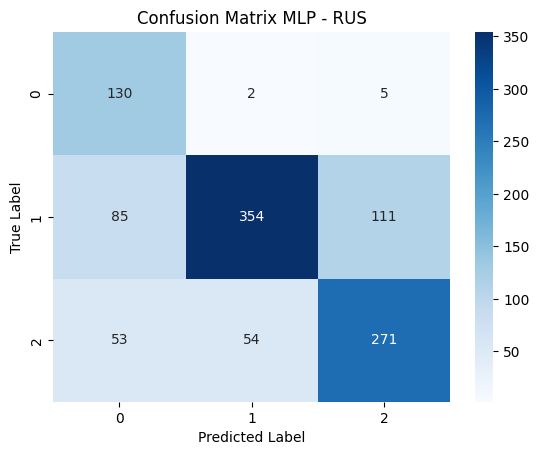

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_mlp, 'Confusion Matrix MLP - RUS')

#### Resultados para dados de Teste - SVM

In [ ]:
predicted_rus_svm = test_acc_rus_svm[np.argmax(val_acc_rus_svm)]
df_svm_rus = print_results(y_test, predicted_rus_svm)
df_svm_rus

,Acurácia,Precisão,Recall,F1-Score
0,73.15,"[50.79, 85.4, 73.54]","[94.16, 70.18, 69.84]","[65.98, 77.05, 71.64]"


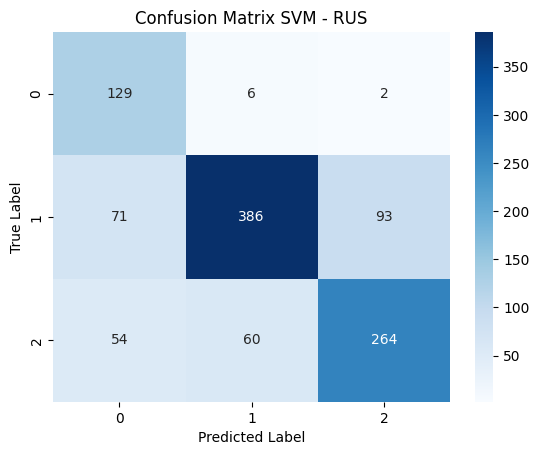

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_svm, 'Confusion Matrix SVM - RUS')

#### Resultados para dados de Teste - Árvore de Decisão

In [ ]:
predicted_rus_tree = test_acc_rus_tree[np.argmax(val_acc_rus_tree)]
df_tree_rus = print_results(y_test, predicted_rus_tree)
df_tree_rus

,Acurácia,Precisão,Recall,F1-Score
0,59.25,"[32.66, 79.29, 70.0]","[94.89, 52.91, 55.56]","[48.6, 63.47, 61.95]"


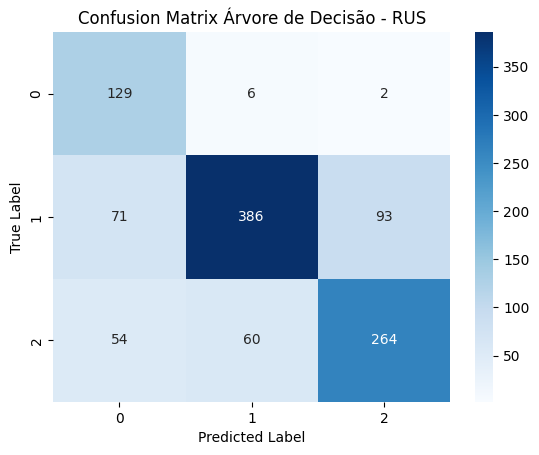

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_svm, 'Confusion Matrix Árvore de Decisão - RUS')

#### Resultados para dados de Teste - KNN

In [ ]:
predicted_rus_knn = test_acc_rus_knn[np.argmax(val_acc_rus_knn)]
df_knn_rus = print_results(y_test, predicted_rus_knn)
df_knn_rus

,Acurácia,Precisão,Recall,F1-Score
0,65.63,"[39.55, 84.04, 67.71]","[89.78, 61.27, 63.23]","[54.91, 70.87, 65.39]"


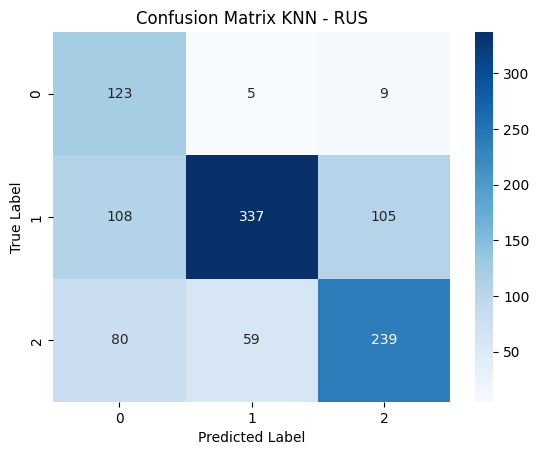

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_knn, 'Confusion Matrix KNN - RUS')

#### Resultados para dados de Teste - Random Forest

In [ ]:
predicted_rus_rf = test_acc_rus_rf[np.argmax(val_acc_rus_rf)]
df_rf_rus = print_results(y_test, predicted_rus_rf)
df_rf_rus

,Acurácia,Precisão,Recall,F1-Score
0,69.39,"[39.64, 86.7, 78.43]","[97.81, 66.36, 63.49]","[56.42, 75.18, 70.18]"


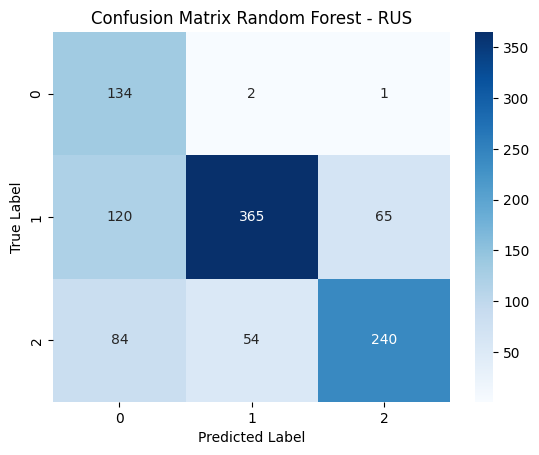

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_rf, 'Confusion Matrix Random Forest - RUS')

#### Resultados para dados de Teste - Naiva Bayes

In [ ]:
predicted_rus_nb = test_acc_rus_nb[np.argmax(val_acc_rus_nb)]
df_nb_rus = print_results(y_test, predicted_rus_nb)
df_nb_rus

,Acurácia,Precisão,Recall,F1-Score
0,73.62,"[50.4, 85.16, 75.0]","[92.7, 72.0, 69.05]","[65.3, 78.03, 71.9]"


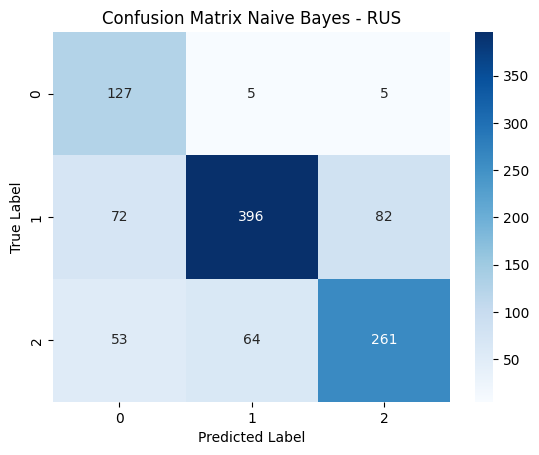

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_nb, 'Confusion Matrix Naive Bayes - RUS')

#### Resultados para dados de Teste - SGDClassifier

In [ ]:
predicted_rus_sgd = test_acc_rus_sgd[np.argmax(val_acc_rus_sgd)]
df_sgd_rus = print_results(y_test, predicted_rus_sgd)
df_sgd_rus

,Acurácia,Precisão,Recall,F1-Score
0,72.96,"[47.39, 84.17, 77.6]","[92.7, 73.45, 65.08]","[62.72, 78.45, 70.79]"


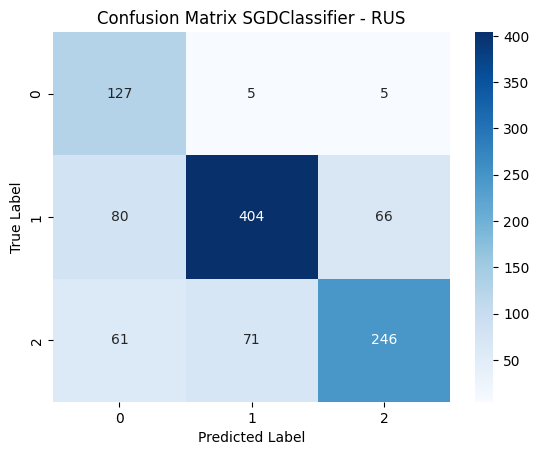

In [ ]:
plot_confusion_matrix(y_test, predicted_rus_sgd, 'Confusion Matrix SGDClassifier - RUS')

## Tabela Geral de Resultados

In [ ]:
df_results = pd.concat([df_mlp_rus, df_svm_rus, df_tree_rus, df_knn_rus, df_rf_rus, df_nb_rus, df_sgd_rus])
df_results.index = ['MLP - RUS', 'SVM - RUS', 'Árvore de Decisão - RUS', 'KNN - RUS', 'Random Forest - RUS', 'Naive Bayes - RUS', 'SGDClassifier - RUS']
df_results

,Acurácia,Precisão,Recall,F1-Score
MLP - RUS,70.89,"[48.51, 86.34, 70.03]","[94.89, 64.36, 71.69]","[64.2, 73.75, 70.85]"
SVM - RUS,73.15,"[50.79, 85.4, 73.54]","[94.16, 70.18, 69.84]","[65.98, 77.05, 71.64]"
Árvore de Decisão - RUS,59.25,"[32.66, 79.29, 70.0]","[94.89, 52.91, 55.56]","[48.6, 63.47, 61.95]"
KNN - RUS,65.63,"[39.55, 84.04, 67.71]","[89.78, 61.27, 63.23]","[54.91, 70.87, 65.39]"
Random Forest - RUS,69.39,"[39.64, 86.7, 78.43]","[97.81, 66.36, 63.49]","[56.42, 75.18, 70.18]"
Naive Bayes - RUS,73.62,"[50.4, 85.16, 75.0]","[92.7, 72.0, 69.05]","[65.3, 78.03, 71.9]"
SGDClassifier,72.96,"[47.39, 84.17, 77.6]","[92.7, 73.45, 65.08]","[62.72, 78.45, 70.79]"


# **7. CONCLUSÕES**
---

Com base nos resultados apresentados, visto que os modelos utilizaram da forma de balanceamento Random Under Sampler (RUS), o escolhido foi o Naive Bayes. Os resultados alcançados com o modelo ressaltam a eficácia dessa abordagem no aprendizado de máquina. A habilidade do algoritmo em compreender e generalizar padrões nos dados, somada à precisão em suas previsões, destaca a utilidade prática do Naive Bayes na tomada de decisões. Vale notar que, dado o foco em NLP e Análise de Sentimentos, priorizou-se não apenas a acurácia, mas também métricas cruciais como recall e F1-score, fortalecendo a confiabilidade do modelo em contextos específicos.
